In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Read data
# Change to data path on your computer
data = pd.read_csv('SAT_GPA.csv')
# Show the description of data
data.describe()
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']
data_len = len(x)

x_data = np.asarray(x).reshape(-1, 1)
y_data = np.asarray(y).reshape(-1, 1)

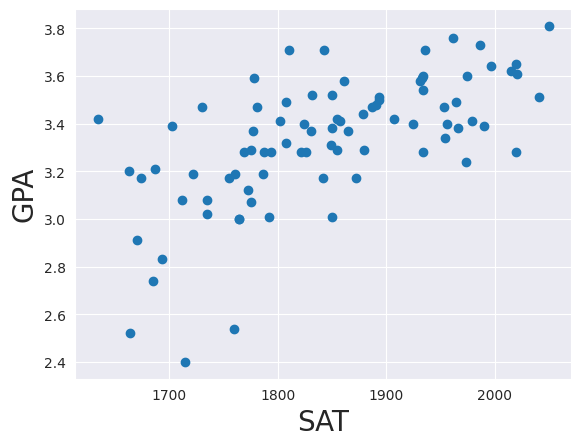

In [3]:
# Remind that we need to put component x_0 = 1 to x
plt.scatter(x_data, y_data)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [4]:
# Function to calculate the mean of data set
def mean(data):
    sum = 0
    for i in range(len(data)):
        sum += data[i]
    return sum / len(data)


# Function to calculate the sxx and syy of data set
def sxx(x):
    sum = 0
    for i in range(len(x)):
        sum += (x[i] - mean(x)) * (x[i] - mean(x))
    return sum


# Function to calculate the sxy of data set
def sxy(x, y):
    sum = 0
    for i in range(len(x)):
        sum += (x[i] - mean(x)) * (y[i] - mean(y))
    return sum


# Function to calculate the Pearson Correlation (r) of data set
def pearson_correlative(x, y):
    return sxy(x, y) / np.sqrt(sxx(x) * sxx(y))

In [5]:
# Split the training set and the validation set
x_train = x_data[:64]
y_train = y_data[:64]
x_test = x_data[64:data_len]
y_test = y_data[64:data_len]

# Preparing the design matrix X (Xbar) which first column contains value 1
# The following column is the feature of data set x_train
one = np.ones((x_train.shape[0], 1))
Xbar = np.concatenate((one, x_train), axis=1)

# Calculate matrix A = X^T * X
# and matrix b = X^T * y
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y_train)

# Solve Normal equation to calculate theta
theta = np.dot(np.linalg.pinv(A), b)

# Coefficients of the linear regression predict function
t_0 = theta[0][0]
t_1 = theta[1][0]

In [6]:
# Calculate the Pearson Correlation (r) of data set
print(f'The pearson correlation: r = {pearson_correlative(x, y)}')

The pearson correlation: r = 0.637184364840191


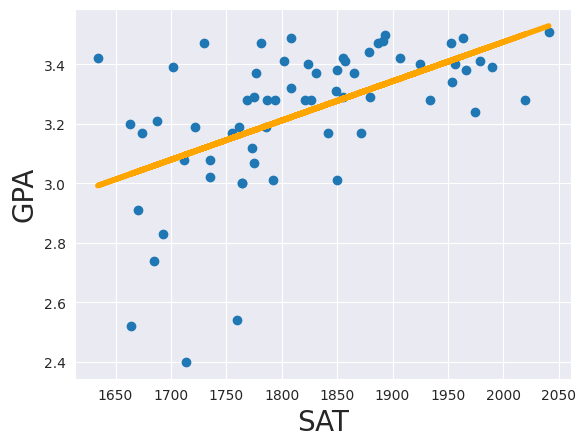

In [7]:
# Draw the linear regression line
plt.scatter(x_train, y_train)
# Predict the value y on the training data for draw regression line
y_train_predict = t_0 + t_1 * x_train
fig = plt.plot(x_train, y_train_predict, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [8]:
# Predict the value y on the validation data
y_predict = t_0 + t_1 * x_test

# Calculate MSE, MAE, R-squared score and print the result
print(f'Mean Squared Error: {mean_squared_error(y_test, y_predict)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}')
print(f'R-squared score: {r2_score(y_test, y_predict)}')

Mean Squared Error: 0.07263824293838703
Mean Absolute Error: 0.24880371696885267
R-squared score: -9.667975170860192
